Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米/field0009.sdf
t() = time
bx(2500, 350, 350) = bx
by(2500, 350, 350) = by
bz(2500, 350, 350) = bz
ex(2500, 350, 350) = ex
ey(2500, 350, 350) = ey
ez(2500, 350, 350) = ez
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


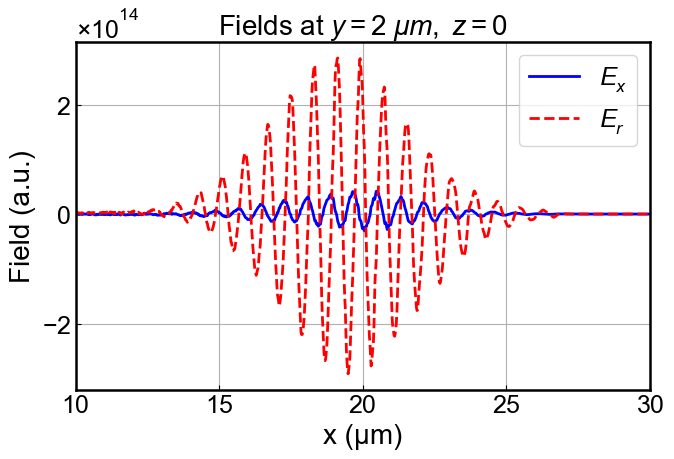

285150896429485.3
41633233459809.18


In [46]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *
import matplotlib as mpl

plt.rcParams.update({
    'font.family': ['Arial'],           # 字体优先使用 Arial，找不到时用 SimHei（支持中文）
    'font.size': 20,                              # 基础字体大小
    'axes.labelsize': 20,                         # 坐标轴标签字体大小
    'axes.titlesize': 20,                         # 坐标轴标题字体大小
    'xtick.labelsize': 18,                        # x 轴刻度标签字体大小
    'ytick.labelsize': 18,                        # y 轴刻度标签字体大小
    'legend.fontsize': 18,                        # 图例字体大小
    'mathtext.fontset': 'custom',                 # 使用自定义数学字体配置
    'mathtext.rm': 'Arial',                       # 数学文本正常字体用 Arial
    'mathtext.it': 'Arial:italic',                # 数学文本斜体用 Arial Italic
    'mathtext.bf': 'Arial:bold',                   # 数学文本粗体用 Arial Bold
    'xtick.direction': 'in',                      # x 轴刻度朝内
    'ytick.direction': 'in',                      # y 轴刻度朝内
})

# === 文件路径 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)

# === 读取电场数据 ===
result = load_field(file_path)
Ey = result['Ey']
Ez = result['Ez']
x = result['x']
y = result['y']
z = result['z']

# === 截取 x = 22.45 μm 平面 ===
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 网格 & 极角 ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标转换 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 重新读取 Ex 数据 ===
Ex = result['Ex']

# === 找到 y=2μm, z=0 对应索引 ===
y_index = np.argmin(np.abs(y - 2e-6))
z_index = np.argmin(np.abs(z - 0.0))

# === 提取 Ex(x), Ey(x), Ez(x) ===
Ex_line = Ex[:, y_index, z_index]
Ey_line = Ey[:, y_index, z_index]
Ez_line = Ez[:, y_index, z_index]

# === 计算对应的 phi（用于计算 Er）===
phi_line = np.arctan2(0.0, 2e-6)  # z = 0, y = 2e-6 → phi = 0

# === 计算 Er(x) ===
Er_line = Ey_line * np.cos(phi_line) + Ez_line * np.sin(phi_line)

# === 画图 ===
plt.figure(figsize=(7,5))
plt.plot(x * 1e6, Ex_line, label=r'$E_x$', color='b', linewidth=2)
plt.plot(x * 1e6, Er_line, label=r'$E_r$', color='r', linestyle='--', linewidth=2)
plt.xlabel('x (μm)')
plt.ylabel('Field (a.u.)')
plt.title(r'Fields at $y=2\ \mu m,\ z=0$')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig("/media/lan/Lexar/my_project/test/Ex_Er_line.pdf", format="pdf", dpi=600)
plt.xlim(10,30)
plt.show()
print(Er_line.max())
print(Ex_line.max())

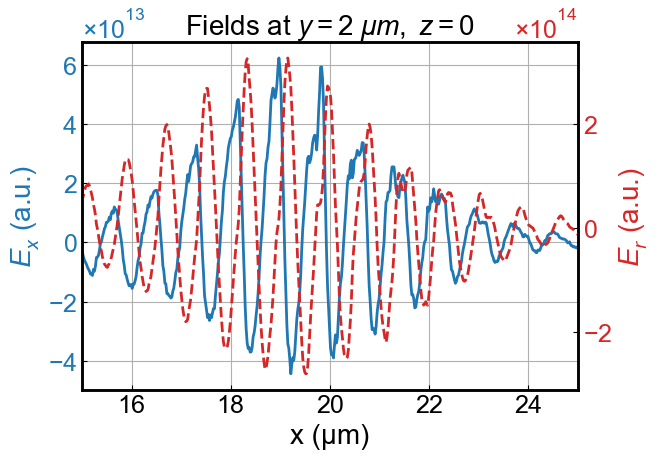

Er max: 3.267e+14
Ex max: 6.241e+13


In [ ]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *
import matplotlib as mpl

plt.rcParams.update({
    'font.family': ['Arial'],           # 字体优先使用 Arial，找不到时用 SimHei（支持中文）
    'font.size': 20,                              # 基础字体大小
    'axes.labelsize': 20,                         # 坐标轴标签字体大小
    'axes.titlesize': 20,                         # 坐标轴标题字体大小
    'xtick.labelsize': 18,                        # x 轴刻度标签字体大小
    'ytick.labelsize': 18,                        # y 轴刻度标签字体大小
    'legend.fontsize': 18,                        # 图例字体大小
    'mathtext.fontset': 'custom',                 # 使用自定义数学字体配置
    'mathtext.rm': 'Arial',                       # 数学文本正常字体用 Arial
    'mathtext.it': 'Arial:italic',                # 数学文本斜体用 Arial Italic
    'mathtext.bf': 'Arial:bold',                   # 数学文本粗体用 Arial Bold
    'xtick.direction': 'in',                      # x 轴刻度朝内
    'ytick.direction': 'in',                      # y 轴刻度朝内
})

# === 文件路径 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-1.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)

# === 读取电场数据 ===
result = load_field(file_path)
Ey = result['Ey']
Ez = result['Ez']
x = result['x']
y = result['y']
z = result['z']

# === 截取 x = 22.45 μm 平面 ===
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 网格 & 极角 ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标转换 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 重新读取 Ex 数据 ===
Ex = result['Ex']

# === 找到 y=2μm, z=0 对应索引 ===
y_index = np.argmin(np.abs(y - 2.5e-6))
z_index = np.argmin(np.abs(z - 0.0))

# === 提取 Ex(x), Ey(x), Ez(x) ===
Ex_line = Ex[:, y_index, z_index]
Ey_line = Ey[:, y_index, z_index]
Ez_line = Ez[:, y_index, z_index]

# === 计算对应的 phi（用于计算 Er）===
phi_line = np.arctan2(0.0, 2e-6)  # z = 0, y = 2e-6 → phi = 0

# === 计算 Er(x) ===
Er_line = Ey_line * np.cos(phi_line) + Ez_line * np.sin(phi_line)

fig, ax1 = plt.subplots(figsize=(7, 5))

# 画 Ex，主 y 轴
color1 = 'tab:blue'
ax1.plot(x * 1e6, Ex_line, label=r'$E_x$', color=color1, linewidth=2)
ax1.set_xlabel('x (μm)')
ax1.set_ylabel(r'$E_x$ (a.u.)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlim(15, 25)

# 创建第二个 y 轴，画 Er
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(x * 1e6, Er_line, label=r'$E_r$', color=color2, linestyle='--', linewidth=2)
ax2.set_ylabel(r'$E_r$ (a.u.)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# 标题 & 网格
plt.title(r'Fields at $y=2\ \mu m,\ z=0$')
ax1.grid(True)
fig.tight_layout()

# 保存或展示
# plt.savefig("/media/lan/Lexar/my_project/test/Ex_Er_dual_axis.pdf", format="pdf", dpi=600)
plt.show()

# 打印最大值
print(f"Er max: {Er_line.max():.3e}")
print(f"Ex max: {Ex_line.max():.3e}")

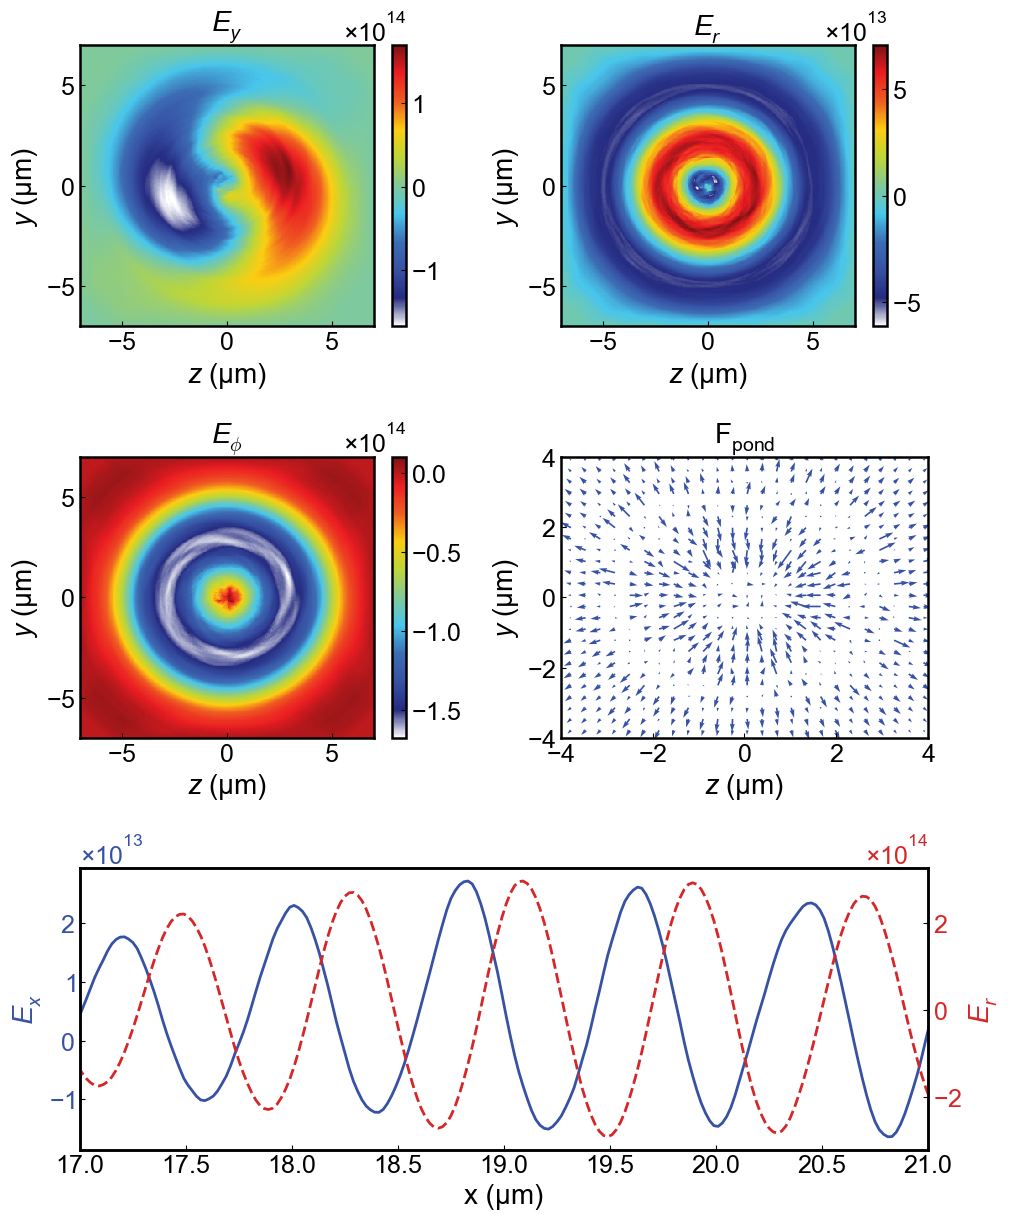

Er max (smoothed): 2.960e+14
Ex max (smoothed): 2.719e+13


In [98]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *
from scipy.signal import savgol_filter
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# === 创建自定义颜色映射 ===
color_list = [
    (255/255, 255/255, 255/255),
    (37/255, 43/255, 128/255),
    (55/255, 82/255, 164/255),
    (60/255, 109/255, 180/255),
    (72/255, 198/255, 235/255),
    (129/255, 201/255, 152/255),
    (189/255, 214/255, 56/255),
    (251/255, 205/255, 17/255),
    (239/255, 94/255, 33/255),
    (235/255, 29/255, 34/255),
    (125/255, 19/255, 21/255)
]
my_cmap = LinearSegmentedColormap.from_list("my_colormap", color_list)

# === 绘图风格设置 ===
plt.rcParams.update({
    'font.family': ['Arial'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

# === 参数设置 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)
x_target = 22.45e-6  # x 切面位置

# === 读取数据 ===
result = load_field(file_path)
Ey, Ez, Ex = result['Ey'], result['Ez'], result['Ex']
x, y, z = result['x'], result['y'], result['z']

# === 截取 x=22.45 μm 平面 ===
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 网格 & 极角 ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标转换函数 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 强度 & 梯度 ===
I_yz = Ey_slice**2 + Ez_slice**2
dz = z[1] - z[0]
dy = y[1] - y[0]
grad_Iz = np.gradient(I_yz, dz, axis=1)
grad_Iy = np.gradient(I_yz, dy, axis=0)

# === 有质动力计算 ===
e = 1.602e-19
m_e = 9.109e-31
c = 3e8
epsilon_0 = 8.854e-12
wavelength = 0.8e-6
omega = 2 * np.pi * c / wavelength
prefactor = - (e**2) / (2 * m_e * omega**2 * c * epsilon_0)
Fp_z = prefactor * grad_Iz
Fp_y = prefactor * grad_Iy

# === 提取 y=2.5μm, z=0 的线型数据 ===
y_index = np.argmin(np.abs(y - 2.5e-6))
z_index = np.argmin(np.abs(z - 0.0))
Ex_line = Ex[:, y_index, z_index]
Ey_line = Ey[:, y_index, z_index]
Ez_line = Ez[:, y_index, z_index]
phi_line = np.arctan2(0.0, 2.5e-6)
Er_line = Ey_line * np.cos(phi_line) + Ez_line * np.sin(phi_line)

# === 平滑处理 ===
window_length = 21
polyorder = 3
Ex_smooth = savgol_filter(Ex_line, window_length, polyorder, mode='nearest')
Er_smooth = savgol_filter(Er_line, window_length, polyorder, mode='nearest')

# === 图像绘制 ===
scale = 0.7
fig = plt.figure(figsize=(15*scale, 18*scale))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

# 第1行
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.pcolormesh(z*1e6, y*1e6, Ey_slice, shading='auto', cmap=my_cmap, rasterized=True)
ax1.set_title('$E_y$')
ax1.set_xlabel('$z$ (μm)')
ax1.set_ylabel('$y$ (μm)')
fig.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
im2 = ax2.pcolormesh(z*1e6, y*1e6, Er, shading='auto', cmap=my_cmap, rasterized=True)
ax2.set_title('$E_r$')
ax2.set_xlabel('$z$ (μm)')
ax2.set_ylabel('$y$ (μm)')
fig.colorbar(im2, ax=ax2)

# 第2行
ax3 = fig.add_subplot(gs[1, 0])
im3 = ax3.pcolormesh(z*1e6, y*1e6, Ephi, shading='auto', cmap=my_cmap, rasterized=True)
ax3.set_title('$E_\\phi$')
ax3.set_xlabel('$z$ (μm)')
ax3.set_ylabel('$y$ (μm)')
fig.colorbar(im3, ax=ax3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_facecolor('white')
ax4.quiver(z[::8]*1e6, y[::8]*1e6, Fp_z[::8, ::8], Fp_y[::8, ::8],
           color='#3752A4', scale=0.5, width=0.0045)
ax4.set_title(r'$\mathrm{F_{pond}}$')
ax4.set_xlabel('$z$ (μm)')
ax4.set_ylabel('$y$ (μm)')
ax4.set_xlim(-4, 4)
ax4.set_ylim(-4, 4)

# 第3行跨两列
ax5 = fig.add_subplot(gs[2, :])
color1 = '#3752A4'
ax5.plot(x * 1e6, Ex_smooth, label=r'$E_x$', color=color1, linewidth=2)
ax5.set_xlabel('x (μm)')
ax5.set_ylabel(r'$E_x$', color=color1)
ax5.tick_params(axis='y', labelcolor=color1)
ax5.set_xlim(17, 21)

ax5b = ax5.twinx()
color2 = 'tab:red'
ax5b.plot(x * 1e6, Er_smooth, label=r'$E_r$', color=color2, linestyle='--', linewidth=2)
ax5b.set_ylabel(r'$E_r$', color=color2)
ax5b.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
# plt.savefig("your_path_here.pdf", format="pdf", dpi=600)
plt.show()

# === 打印最大值 ===
print(f"Er max (smoothed): {Er_smooth.max():.3e}")
print(f"Ex max (smoothed): {Ex_smooth.max():.3e}")


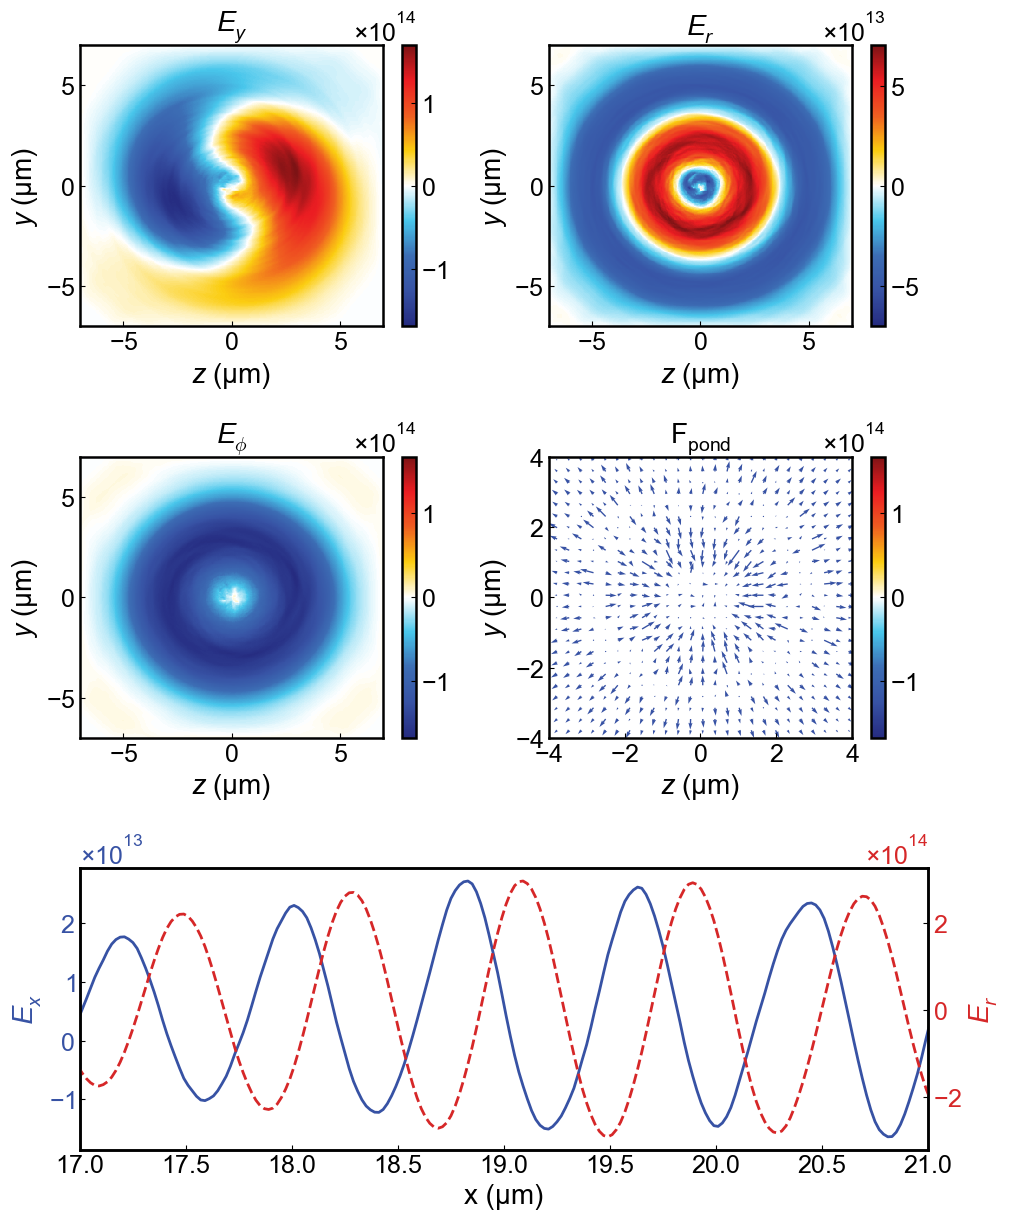

Er max (smoothed): 2.960e+14
Ex max (smoothed): 2.719e+13


In [103]:
import sys, os
sys.path.append(os.path.abspath('..'))
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
from sdf_utils import *
from scipy.signal import savgol_filter
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# === 创建自定义颜色映射（中心为白色） ===
color_list = [
    # (255/255, 255/255, 255/255),
    (37/255, 43/255, 128/255),
    (55/255, 82/255, 164/255),
    (60/255, 109/255, 180/255),
    (72/255, 198/255, 235/255),
    # (129/255, 201/255, 152/255),
    (255/255, 255/255, 255/255),
    # (189/255, 214/255, 56/255),
    (251/255, 205/255, 17/255),
    (239/255, 94/255, 33/255),
    (235/255, 29/255, 34/255),
    (125/255, 19/255, 21/255)
]
my_cmap = LinearSegmentedColormap.from_list("my_colormap", color_list)

# === 绘图风格设置 ===
plt.rcParams.update({
    'font.family': ['Arial'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

# === 参数设置 ===
base_dir = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.5微米'
file_name = 'field0009.sdf'
file_path = os.path.join(base_dir, file_name)
x_target = 22.45e-6  # x 切面位置

# === 读取数据 ===
result = load_field(file_path)
Ey, Ez, Ex = result['Ey'], result['Ez'], result['Ex']
x, y, z = result['x'], result['y'], result['z']

# === 截取 x=22.45 μm 平面 ===
x_index = np.argmin(np.abs(x - x_target))
Ey_slice = Ey[x_index, :, :]
Ez_slice = Ez[x_index, :, :]

# === 网格 & 极角 ===
Y, Z = np.meshgrid(y, z, indexing='ij')
phi = np.arctan2(Z, Y)

# === 笛卡尔 -> 柱坐标转换函数 ===
def cartesian_to_polar_field(Ey, Ez, phi):
    E_r = Ey * np.cos(phi) + Ez * np.sin(phi)
    E_phi = -Ey * np.sin(phi) + Ez * np.cos(phi)
    return E_r, E_phi

Er, Ephi = cartesian_to_polar_field(Ey_slice, Ez_slice, phi)

# === 强度 & 梯度 ===
I_yz = Ey_slice**2 + Ez_slice**2
dz = z[1] - z[0]
dy = y[1] - y[0]
grad_Iz = np.gradient(I_yz, dz, axis=1)
grad_Iy = np.gradient(I_yz, dy, axis=0)

# === 有质动力计算 ===
e = 1.602e-19
m_e = 9.109e-31
c = 3e8
epsilon_0 = 8.854e-12
wavelength = 0.8e-6
omega = 2 * np.pi * c / wavelength
prefactor = - (e**2) / (2 * m_e * omega**2 * c * epsilon_0)
Fp_z = prefactor * grad_Iz
Fp_y = prefactor * grad_Iy

# === 提取 y=2.5μm, z=0 的线型数据 ===
y_index = np.argmin(np.abs(y - 2.5e-6))
z_index = np.argmin(np.abs(z - 0.0))
Ex_line = Ex[:, y_index, z_index]
Ey_line = Ey[:, y_index, z_index]
Ez_line = Ez[:, y_index, z_index]
phi_line = np.arctan2(0.0, 2.5e-6)
Er_line = Ey_line * np.cos(phi_line) + Ez_line * np.sin(phi_line)

# === 平滑处理 ===
window_length = 21
polyorder = 3
Ex_smooth = savgol_filter(Ex_line, window_length, polyorder, mode='nearest')
Er_smooth = savgol_filter(Er_line, window_length, polyorder, mode='nearest')

# === 统一色标设置 ===
def get_symmetric_norm(data):
    vmax = np.max(np.abs(data))
    return TwoSlopeNorm(vcenter=0.0, vmin=-vmax, vmax=vmax)

norm_Ey = get_symmetric_norm(Ey_slice)
norm_Er = get_symmetric_norm(Er)
norm_Ephi = get_symmetric_norm(Ephi)

# === 图像绘制 ===
scale = 0.7
fig = plt.figure(figsize=(15*scale, 18*scale))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

# 第1行
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.pcolormesh(z*1e6, y*1e6, Ey_slice, shading='auto', cmap=my_cmap, norm=norm_Ey, rasterized=True)
ax1.set_title('$E_y$')
ax1.set_xlabel('$z$ (μm)')
ax1.set_ylabel('$y$ (μm)')
fig.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
im2 = ax2.pcolormesh(z*1e6, y*1e6, Er, shading='auto', cmap=my_cmap, norm=norm_Er, rasterized=True)
ax2.set_title('$E_r$')
ax2.set_xlabel('$z$ (μm)')
ax2.set_ylabel('$y$ (μm)')
fig.colorbar(im2, ax=ax2)

# 第2行
ax3 = fig.add_subplot(gs[1, 0])
im3 = ax3.pcolormesh(z*1e6, y*1e6, Ephi, shading='auto', cmap=my_cmap, norm=norm_Ephi, rasterized=True)
ax3.set_title('$E_\\phi$')
ax3.set_xlabel('$z$ (μm)')
ax3.set_ylabel('$y$ (μm)')
fig.colorbar(im3, ax=ax3)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_facecolor('white')
ax4.quiver(z[::8]*1e6, y[::8]*1e6, Fp_z[::8, ::8], Fp_y[::8, ::8],
           color='#3752A4', scale=0.5, width=0.0045)
ax4.set_title(r'$\mathrm{F_{pond}}$')
ax4.set_xlabel('$z$ (μm)')
ax4.set_ylabel('$y$ (μm)')
ax4.set_xlim(-4, 4)
ax4.set_ylim(-4, 4)
fig.colorbar(im3, ax=ax4)

# 第3行跨两列
ax5 = fig.add_subplot(gs[2, :])
color1 = '#3752A4'
ax5.plot(x * 1e6, Ex_smooth, label=r'$E_x$', color=color1, linewidth=2)
ax5.set_xlabel('x (μm)')
ax5.set_ylabel(r'$E_x$', color=color1)
ax5.tick_params(axis='y', labelcolor=color1)
ax5.set_xlim(17, 21)

ax5b = ax5.twinx()
color2 = 'tab:red'
ax5b.plot(x * 1e6, Er_smooth, label=r'$E_r$', color=color2, linestyle='--', linewidth=2)
ax5b.set_ylabel(r'$E_r$', color=color2)
ax5b.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.savefig("your_path_here.pdf", format="pdf", dpi=600)
plt.show()

# === 打印最大值 ===
print(f"Er max (smoothed): {Er_smooth.max():.3e}")
print(f"Ex max (smoothed): {Ex_smooth.max():.3e}")
